# Onion peeling procedure

## Input and output

We want to compute the array:
$$
\forall (k, l) \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket^2, \, \widehat{I}_D(k, l) = \sum_{u \in \mathcal{D}(n)} \sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{2ku + 2lv}{m} \right)
$$

from the samples of the pseudo polar Fourier transform of $I$:
$$
\widehat{I}_h (k, l) = \sum_{u \in \mathcal{D}(n)} \sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{-\frac{2lk}{n}u + kv}{m} \right) \\
\widehat{I}_v (k, l) = \sum_{u \in \mathcal{D}(n)} \sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{ku -\frac{2lk}{n}v}{m} \right)
$$

where $k \in \llbracket -n, n \rrbracket$ and $l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket$. These arrays are basically samples of the trigonometric polynomial:
$$
\widehat{I}(\xi_x, \xi_y) = \sum_{u \in \mathcal{D}(n)} \sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{\xi_x u + \xi_y v}{m} \right)
$$

## Description of the algorithm

At step $k \in \llbracket -n/2, 0 \rrbracket$, suppose we have computed $\widehat{I}_D(k', :), \widehat{I}_D(-k', :), \widehat{I}_D(:, k'), \widehat{I}_D(:, -k')$ for all $k' < k$.

### Recovering a row

We want to compute $\widehat{I}_D(k, :)$. It is:
$$
\begin{align*}
\forall l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket, \, \widehat{I}_D(k, l) &= \sum_{u \in \mathcal{D}(n)} \sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{2ku}{m} \right) \exp\left(-2i\pi \frac{2lv}{m} \right) \\
&= P\left( -\frac{4\pi l}{m} \right)
\end{align*}
$$

where:
$$
P(x) = \sum_{v \in \mathcal{D}(n)} \left[\sum_{u \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{2ku}{m} \right) \right] \exp\left(i v x \right) = \sum_{v \in \mathcal{D}(n)} \alpha_v \exp\left(i v x \right)
$$

$P$ is a univariate trigonometric polynomial. If we look at $\widehat{I}_v(2k, :)$, we see that:
$$
\forall l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket, \, \widehat{I}_v(2k, l) = P\left(\frac{8\pi l k}{n m} \right)
$$

We also have already computed some values of $\widehat{I}_D$. If $k \leq 0$, we have for $k' < k$:
$$
\widehat{I}_D(k, k') = P\left( -\frac{4\pi k'}{m} \right) \text{ and } \widehat{I}_D(k, -k') = P\left(\frac{4\pi k'}{m} \right)
$$

If $k \geq 0$, we have for $k' > k$:
$$
\widehat{I}_D(k, k') = P\left( -\frac{4\pi k'}{m} \right) \text{ and } \widehat{I}_D(k, -k') = P\left(\frac{4\pi k'}{m} \right)
$$

The problem we need to solve is the following: from the samples of $P$ we already know, resample $P$ at the target positions $- 4 \pi l / m$ for $l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket$. 

This is done by using fast resampling algorithms, which allows us to compute the coefficients $\alpha_v$. Then, we need to compute:
$$
\forall l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket, \, P\left( -\frac{4\pi l}{m} \right) = \sum_{v \in \mathcal{D}(n)} \alpha_v \exp\left(- 2 i \pi \frac{2 l v}{m} \right)
$$

which is the 1D FFT of a zero-padded version of $\alpha$, sampled at $l' = 2l$ for $l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket$.

In the article, since we want to compute $n$ values of $P$ (they exclude the first/last row since it is already known), they first select the $n$ values we know that are the closest to the target positions. We don't know if this is necessary, as the fast resampling works when we have more known points than target ones. The number of known points is:
$$
n + 1 + 2s
$$

where $s \geq 0$ is the step.

### Recovering a column

At step $k \in \llbracket -n/2, 0 \rrbracket$, suppose we have computed $\widehat{I}_D(k', :), \widehat{I}_D(-k', :), \widehat{I}_D(:, k'), \widehat{I}_D(:, -k')$ for all $k' < k$.

We want to compute $\widehat{I}_D(:, k)$. It is:
$$
\begin{align*}
\forall l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket, \, \widehat{I}_D(l, k) &= \sum_{u \in \mathcal{D}(n)} \sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{2lu}{m} \right) \exp\left(-2i\pi \frac{2kv}{m} \right) \\
&= P\left( -\frac{4\pi l}{m} \right)
\end{align*}
$$

where:
$$
P(x) = \sum_{u \in \mathcal{D}(n)} \left[\sum_{v \in \mathcal{D}(n)} I(u, v) \exp\left(-2i\pi \frac{2kv}{m} \right) \right] \exp\left(i u x \right) = \sum_{u \in \mathcal{D}(n)} \alpha_v \exp\left(i u x \right)
$$

$P$ is a univariate trigonometric polynomial. If we look at $\widehat{I}_h(2k, :)$, we see that:
$$
\forall l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket, \, \widehat{I}_h(2k, l) = P\left(\frac{8\pi l k}{n m} \right)
$$

We also have already computed some values of $\widehat{I}_D$. If $k \leq 0$, we have for $k' < k$:
$$
\widehat{I}_D(k', k) = P\left( -\frac{4\pi k'}{m} \right) \text{ and } \widehat{I}_D(-k', k) = P\left(\frac{4\pi k'}{m} \right)
$$

If $k \geq 0$, we have for $k' > k$:
$$
\widehat{I}_D(k', k) = P\left( -\frac{4\pi k'}{m} \right) \text{ and } \widehat{I}_D(-k', k) = P\left(\frac{4\pi k'}{m} \right)
$$

The problem we need to solve is the following: from the samples of $P$ we already know, resample $P$ at the target positions $- 4 \pi l / m$ for $l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket$. 

This is done by using fast resampling algorithms, which allows us to compute the coefficients $\alpha_v$. Then, we need to compute:
$$
\forall l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket, \, P\left( -\frac{4\pi l}{m} \right) = \sum_{v \in \mathcal{D}(n)} \alpha_v \exp\left(- 2 i \pi \frac{2 l v}{m} \right)
$$

which is the 1D FFT of a zero-padded version of $\alpha$, sampled at $l' = 2l$ for $l \in \llbracket - \frac{n}{2}, \frac{n}{2}\rrbracket$.

## Reminder on the storage of the PPFFT

The horizontal ppfft is stored in ``hori_ppfft`` which is a $(n + 1, 2n + 1)$ array satisfying:
$$
\forall (k, l) \in \llbracket -n, n \rrbracket \times \llbracket -n/2, n/2 \rrbracket, \, \widehat{I}_h(k, l) = \texttt{hori\_ppfft[l + n//2, k + n]}
$$

The vertical ppfft is stored in ``vert_ppfft`` which is a $(n + 1, 2n + 1)$ array satisfying:
$$
\forall (k, l) \in \llbracket -n, n \rrbracket \times \llbracket -n/2, n/2 \rrbracket, \, \widehat{I}_v(k, l) = \texttt{vert\_ppfft[l + n//2, k + n]}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ppfft.ppfft.ppfft import ppfft
from ppfft.tools.pad import pad
from ppfft.tools.new_fft import new_fft, new_fft2
from ppfft.resampling.fast_resampling import compute_alpha


## Computation of true $\widehat{I}_D$

In [2]:
def compute_true_Id(im):
    n = len(im)
    m = 2 * n + 1
    pad_im = pad(im, (m, m))
    return new_fft2(pad_im)[::2, ::2]


## Point selection

In practice, only ``find_closest`` is used, as it gives better results.

In [3]:
def find_closest_negative(y, n):
    m = 2 * n + 1
    target = - 4 * np.pi * np.arange(-(n//2), n//2) / m
    return np.argmin(np.abs(y[:, None] - target[None, :]), axis=0)


def find_closest_positive(y, n):
    m = 2 * n + 1
    target = - 4 * np.pi * np.arange(-(n//2) + 1, n//2 + 1) / m
    return np.argmin(np.abs(y[:, None] - target[None, :]), axis=0)


def find_closest(y, n):
    m = 2 * n + 1
    target = - 4 * np.pi * np.arange(-(n//2), n//2 + 1) / m
    return np.argmin(np.abs(y[:, None] - target[None, :]), axis=0)


## Recover negative rows

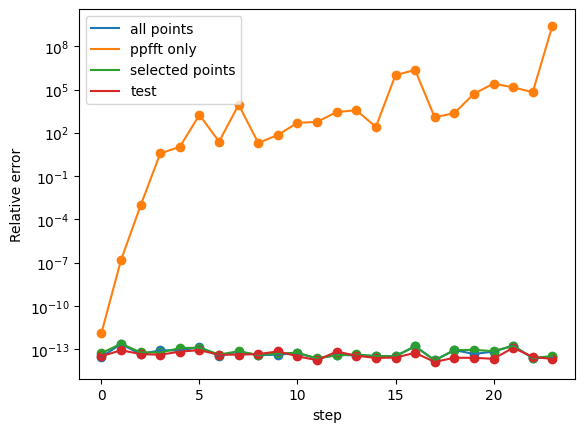

In [4]:
n = 50
half_n = n//2
m = 2 * n + 1
im = np.random.rand(n, n)
hori_ppfft, vert_ppfft = ppfft(im)
true_Id = compute_true_Id(im)

errs = []
errs_ppfft_only = []
errs_selected = []
errs_test = []

for k in range(-(n//2) + 1, 0):
    true_k = k + n//2

    true_alpha = np.einsum(
        "uv,u->v", im, np.exp(-2j * np.pi * 2 * k * np.arange(-(n//2), n//2) / m))

    known_ppfft = vert_ppfft[:, 2 * k + n]
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_left = true_Id[true_k, :true_k]
    y_left = - 4 * np.pi * np.arange(-half_n, k) / m

    known_I_D_right = true_Id[true_k, -true_k:][::-1]
    y_right = 4 * np.pi * np.arange(-half_n, k) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate((y_left, y_ppfft, y_right))

    alpha = compute_alpha(y, n, known_samples)

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha_selected = compute_alpha(y, n, known_samples)

    alpha_ppfft_only = compute_alpha(y_ppfft, n, known_ppfft)

    errs.append(np.max(np.abs(true_alpha - alpha) / np.abs(true_alpha)))

    errs_ppfft_only.append(
        np.max(np.abs(true_alpha - alpha_ppfft_only) / np.abs(true_alpha)))

    errs_selected.append(
        np.max(np.abs(true_alpha - alpha_selected) / np.abs(true_alpha)))

    true_samples = true_Id[true_k]
    true_positions = - 4 * np.pi * np.arange(-(n//2), n//2 + 1) / m
    test_true_alpha = compute_alpha(true_positions, n, true_samples)
    errs_test.append(
        np.max(np.abs(test_true_alpha - true_alpha) / np.abs(true_alpha)))

plt.scatter(np.arange(len(errs)), errs)
plt.plot(errs, label="all points")
plt.scatter(np.arange(len(errs_ppfft_only)), errs_ppfft_only)
plt.plot(errs_ppfft_only, label="ppfft only")
plt.scatter(np.arange(len(errs_selected)), errs_selected)
plt.plot(errs_selected, label="selected points")
plt.scatter(np.arange(len(errs_test)), errs_test)
plt.plot(errs_test, label="test")
plt.legend()
plt.xlabel("step")
plt.ylabel("Relative error")
plt.yscale("log")


## Recovering positive rows

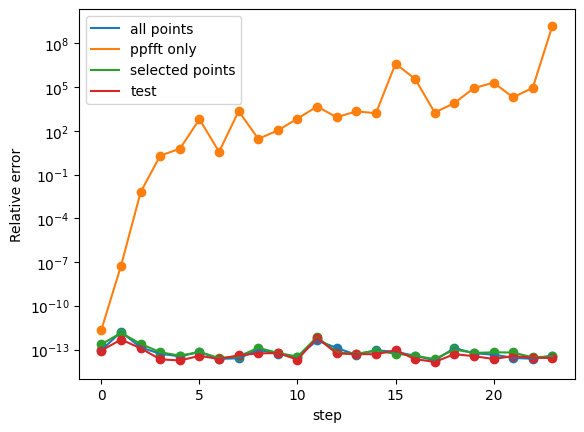

In [5]:
n = 50
half_n = n//2
m = 2 * n + 1
im = np.random.rand(n, n)
hori_ppfft, vert_ppfft = ppfft(im)
true_Id = compute_true_Id(im)

errs = []
errs_ppfft_only = []
errs_selected = []
errs_test = []

for aux in range(-(n//2) + 1, 0):
    k = -aux

    true_k = k + n//2

    true_alpha = np.einsum(
        "uv,u->v", im, np.exp(-2j * np.pi * 2 * k * np.arange(-(n//2), n//2) / m))

    known_ppfft = vert_ppfft[:, 2 * k + n]
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_left = true_Id[true_k, (true_k - n):]
    y_left = - 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_I_D_right = true_Id[true_k, :(n - true_k)][::-1]
    y_right = 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate((y_left, y_ppfft, y_right))

    alpha = compute_alpha(y, n, known_samples)

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha_selected = compute_alpha(y, n, known_samples)

    alpha_ppfft_only = compute_alpha(y_ppfft, n, known_ppfft)

    errs.append(np.max(np.abs(true_alpha - alpha) / np.abs(true_alpha)))

    errs_ppfft_only.append(
        np.max(np.abs(true_alpha - alpha_ppfft_only) / np.abs(true_alpha)))

    errs_selected.append(
        np.max(np.abs(true_alpha - alpha_selected) / np.abs(true_alpha)))

    true_samples = true_Id[true_k]
    true_positions = - 4 * np.pi * np.arange(-(n//2), n//2 + 1) / m
    test_true_alpha = compute_alpha(true_positions, n, true_samples)
    errs_test.append(
        np.max(np.abs(test_true_alpha - true_alpha) / np.abs(true_alpha)))

plt.scatter(np.arange(len(errs)), errs)
plt.plot(errs, label="all points")
plt.scatter(np.arange(len(errs_ppfft_only)), errs_ppfft_only)
plt.plot(errs_ppfft_only, label="ppfft only")
plt.scatter(np.arange(len(errs_selected)), errs_selected)
plt.plot(errs_selected, label="selected points")
plt.scatter(np.arange(len(errs_test)), errs_test)
plt.plot(errs_test, label="test")
plt.legend()
plt.xlabel("step")
plt.ylabel("Relative error")
plt.yscale("log")


## Recovering negative columns

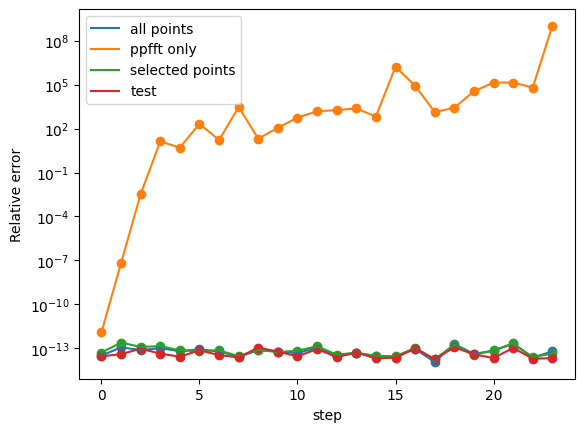

In [6]:
n = 50
half_n = n//2
m = 2 * n + 1
im = np.random.rand(n, n)
hori_ppfft, vert_ppfft = ppfft(im)
true_Id = compute_true_Id(im)

errs = []
errs_ppfft_only = []
errs_selected = []
errs_test = []

for k in range(-(n//2) + 1, 0):

    true_k = k + n//2

    true_alpha = np.einsum(
        "uv,v->u", im, np.exp(-2j * np.pi * 2 * k * np.arange(-(n//2), n//2) / m))

    known_ppfft = hori_ppfft[:, 2 * k + n]  # n + 1 elements
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_left = true_Id[:true_k, true_k]
    y_left = - 4 * np.pi * np.arange(-half_n, k) / m

    known_I_D_right = true_Id[-true_k:, true_k][::-1]
    y_right = 4 * np.pi * np.arange(-half_n, k) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate((y_left, y_ppfft, y_right))

    alpha = compute_alpha(y, n, known_samples)

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha_selected = compute_alpha(y, n, known_samples)

    alpha_ppfft_only = compute_alpha(y_ppfft, n, known_ppfft)

    errs.append(np.max(np.abs(true_alpha - alpha) / np.abs(true_alpha)))

    errs_ppfft_only.append(
        np.max(np.abs(true_alpha - alpha_ppfft_only) / np.abs(true_alpha)))

    errs_selected.append(
        np.max(np.abs(true_alpha - alpha_selected) / np.abs(true_alpha)))

    true_samples = true_Id[:, true_k]
    true_positions = - 4 * np.pi * np.arange(-(n//2), n//2 + 1) / m
    test_true_alpha = compute_alpha(true_positions, n, true_samples)
    errs_test.append(
        np.max(np.abs(test_true_alpha - true_alpha) / np.abs(true_alpha)))

plt.scatter(np.arange(len(errs)), errs)
plt.plot(errs, label="all points")
plt.scatter(np.arange(len(errs_ppfft_only)), errs_ppfft_only)
plt.plot(errs_ppfft_only, label="ppfft only")
plt.scatter(np.arange(len(errs_selected)), errs_selected)
plt.plot(errs_selected, label="selected points")
plt.scatter(np.arange(len(errs_test)), errs_test)
plt.plot(errs_test, label="test")
plt.legend()
plt.xlabel("step")
plt.ylabel("Relative error")
plt.yscale("log")


## Recovering positive columns

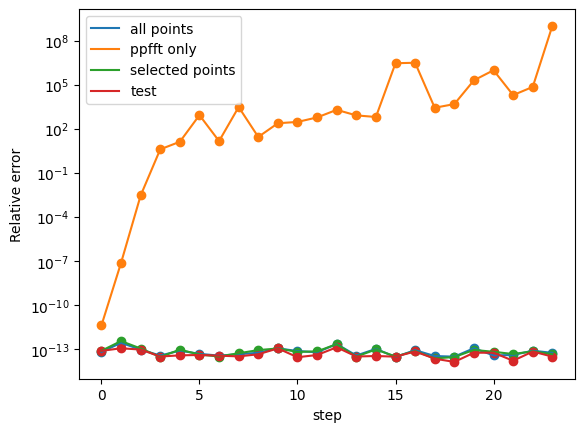

In [7]:
n = 50
half_n = n//2
m = 2 * n + 1
im = np.random.rand(n, n)
hori_ppfft, vert_ppfft = ppfft(im)
true_Id = compute_true_Id(im)

errs = []
errs_ppfft_only = []
errs_selected = []
errs_test = []

for aux in range(-(n//2) + 1, 0):
    k = -aux

    true_k = k + n//2

    true_alpha = np.einsum(
        "uv,v->u", im, np.exp(-2j * np.pi * 2 * k * np.arange(-(n//2), n//2) / m))

    known_ppfft = hori_ppfft[:, 2 * k + n]  # n + 1 elements
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_right = true_Id[:(n - true_k), true_k][::-1]
    y_left = - 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_I_D_left = true_Id[(true_k - n):, true_k]
    y_right = 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate((y_left, y_ppfft, y_right))

    alpha = compute_alpha(y, n, known_samples)

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha_selected = compute_alpha(y, n, known_samples)

    alpha_ppfft_only = compute_alpha(y_ppfft, n, known_ppfft)

    errs.append(np.max(np.abs(true_alpha - alpha) / np.abs(true_alpha)))

    errs_ppfft_only.append(
        np.max(np.abs(true_alpha - alpha_ppfft_only) / np.abs(true_alpha)))

    errs_selected.append(
        np.max(np.abs(true_alpha - alpha_selected) / np.abs(true_alpha)))

    true_samples = true_Id[:, true_k]
    true_positions = - 4 * np.pi * np.arange(-(n//2), n//2 + 1) / m
    test_true_alpha = compute_alpha(true_positions, n, true_samples)
    errs_test.append(
        np.max(np.abs(test_true_alpha - true_alpha) / np.abs(true_alpha)))

plt.scatter(np.arange(len(errs)), errs)
plt.plot(errs, label="all points")
plt.scatter(np.arange(len(errs_ppfft_only)), errs_ppfft_only)
plt.plot(errs_ppfft_only, label="ppfft only")
plt.scatter(np.arange(len(errs_selected)), errs_selected)
plt.plot(errs_selected, label="selected points")
plt.scatter(np.arange(len(errs_test)), errs_test)
plt.plot(errs_test, label="test")
plt.legend()
plt.xlabel("step")
plt.ylabel("Relative error")
plt.yscale("log")


## Initialization of $\widehat{I}_D$

We have, for all $l \in \llbracket -n/2, n/2\rrbracket$:
$$
\begin{align*}
&\widehat{I}_D(-n/2, l) &= \widehat{I}_v(-n, l) &= \texttt{vert\_ppfft[l + n//2, 0]} \\
&\widehat{I}_D(n/2, l) &= \widehat{I}_v(n, -l) &= \texttt{vert\_ppfft[-l + n//2, -1]}\\
&\widehat{I}_D(l, -n/2) &= \widehat{I}_h(-n, l) &= \texttt{hori\_ppfft[l + n//2, 0]}\\
&\widehat{I}_D(l, n/2) &= \widehat{I}_h(n, -l) &= \texttt{hori\_ppfft[-l + n//2, -1]}
\end{align*}
$$

In [8]:
def initialize(hori_ppfft, vert_ppfft):
    n = hori_ppfft.shape[0] - 1

    I_d = np.zeros(shape=(n+1, n+1), dtype=complex)

    I_d[0] = vert_ppfft[:, 0]  # x = -n/2
    I_d[-1] = vert_ppfft[::-1, -1]  # x = n/2
    I_d[:, 0] = hori_ppfft[:, 0]  # y = -n/2
    I_d[:, -1] = hori_ppfft[::-1, -1]  # y = n/2

    return I_d


## Resampling from $\alpha$

In [9]:
def resample_row(alpha):
    n = len(alpha)
    pad_alpha = pad(alpha, new_shape=(2 * n + 1,))
    fft_alpha = new_fft(pad_alpha)
    return fft_alpha[::2]


In [10]:
def recover_row_negative(k, vert_ppfft, Id):
    """
    Recovers row  -(n//2) < k < 0 of Id.
    Id is modified in place.
    """
    n, m = vert_ppfft.shape[0] - 1, vert_ppfft.shape[1]
    half_n = n//2
    true_k = k + half_n

    known_ppfft = vert_ppfft[:, 2 * k + n]
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_left = Id[true_k, :true_k]
    y_left = - 4 * np.pi * np.arange(-half_n, k) / m

    known_I_D_right = Id[true_k, -true_k:][::-1]
    y_right = 4 * np.pi * np.arange(-half_n, k) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate((y_left, y_ppfft, y_right))

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha = compute_alpha(y, n, known_samples)

    res = resample_row(alpha)

    Id[true_k, true_k:-true_k] = res[true_k:-true_k]


def recover_row_positive(k, vert_ppfft, Id):
    """
    Recovers row 0 < k < n//2 of Id.
    Id is modified in place.
    """
    n, m = vert_ppfft.shape[0] - 1, vert_ppfft.shape[1]
    half_n = n//2
    true_k = k + half_n

    known_ppfft = vert_ppfft[:, 2 * k + n]
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_right = Id[true_k, :(n - true_k)][::-1]
    y_left = - 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_I_D_left = Id[true_k, (true_k - n):]
    y_right = 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate(
        (y_left, y_ppfft, y_right))

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha = compute_alpha(y, n, known_samples)

    res = resample_row(alpha)

    Id[true_k, (n-true_k):(true_k-n)] = res[(n-true_k):(true_k-n)]


def recover_row(k, vert_ppfft, Id):
    """
    Recovers rows k and -k of Id.
    Here, -(n//2) < k < 0
   """
    n = vert_ppfft.shape[0] - 1
    assert -(n//2) < k < 0
    recover_row_negative(k, vert_ppfft, Id)
    recover_row_positive(-k, vert_ppfft, Id)


In [11]:
def recover_col_negative(k, hori_ppfft, Id):
    """
    Recovers column -(n//2) < k < 0 of Id.
    Id is modified in place.
    """
    n, m = hori_ppfft.shape[0] - 1, hori_ppfft.shape[1]
    half_n = n//2
    true_k = k + half_n

    known_ppfft = hori_ppfft[:, 2 * k + n]  # n + 1 elements
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_left = Id[:true_k, true_k]
    y_left = - 4 * np.pi * np.arange(-half_n, k) / m

    known_I_D_right = Id[-true_k:, true_k][::-1]
    y_right = 4 * np.pi * np.arange(-half_n, k) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate((y_left, y_ppfft, y_right))

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha = compute_alpha(y, n, known_samples)

    res = resample_row(alpha)

    Id[true_k:-true_k, true_k] = res[true_k:-true_k]


def recover_col_positive(k, hori_ppfft, Id):
    """
    Recovers column 0 < k < n//2 Id.
    Id is modified in place.
    """
    n, m = hori_ppfft.shape[0] - 1, hori_ppfft.shape[1]
    half_n = n//2
    true_k = k + half_n

    known_ppfft = hori_ppfft[:, 2 * k + n]  # n + 1 elements
    y_ppfft = 8 * np.pi * k * np.arange(-half_n, half_n + 1) / (n * m)

    known_I_D_right = Id[:(n - true_k), true_k][::-1]
    y_left = - 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_I_D_left = Id[(true_k - n):, true_k]
    y_right = 4 * np.pi * np.arange(k + 1, half_n + 1) / m

    known_samples = np.concatenate(
        (known_I_D_left, known_ppfft, known_I_D_right))

    y = np.concatenate(
        (y_left, y_ppfft, y_right))

    index_to_remove = find_closest(y, n)
    known_samples = np.take(known_samples, index_to_remove)
    y = np.take(y, index_to_remove)

    alpha = compute_alpha(y, n, known_samples)

    res = resample_row(alpha)

    Id[(n - true_k):(true_k - n), true_k] = res[(n - true_k):(true_k - n)]


def recover_col(k, hori_ppfft, Id):
    """
    Recovers columns k and -k of Id.
    Here, -(n//2) < k < 0
    """
    n = hori_ppfft.shape[0] - 1
    assert -(n//2) < k < 0
    recover_col_negative(k, hori_ppfft, Id)
    recover_col_positive(-k, hori_ppfft, Id)


In [12]:
def onion_peeling(hori_ppfft, vert_ppfft):
    Id = initialize(hori_ppfft, vert_ppfft)
    n = hori_ppfft.shape[0] - 1

    for k in np.arange(-(n//2) + 1, 0):
        recover_row(k, vert_ppfft, Id)
        recover_col(k, hori_ppfft, Id)

    Id[n//2, n//2] = hori_ppfft[0, n]

    return Id


In [13]:
n = 50
im = np.random.rand(n, n)
hori_ppfft, vert_ppfft = ppfft(im)

Id = onion_peeling(hori_ppfft, vert_ppfft)
true_Id = compute_true_Id(im)


In [14]:
print(np.max(np.abs(Id - true_Id)) / np.max(np.abs(true_Id)))
print(np.sum(np.abs(Id - true_Id)**2) / np.sum(np.abs(true_Id)**2))


4.1896046705280245e-08
1.5276437443335307e-15


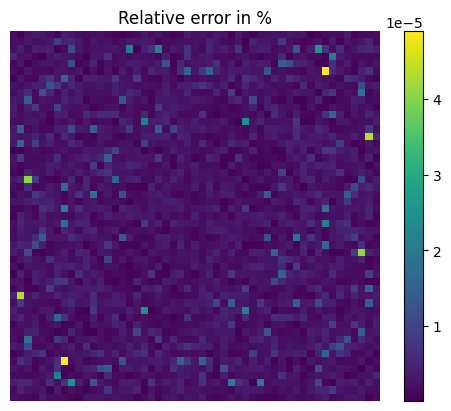

In [15]:
plt.imshow(100 * np.abs(Id - true_Id) / np.abs(true_Id))
plt.title("Relative error in %")
plt.axis("off")
plt.colorbar()


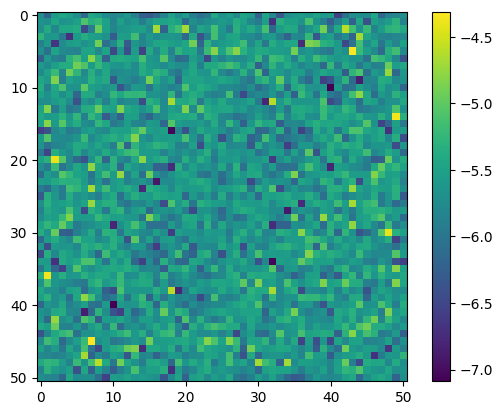

In [16]:
plt.imshow(np.log10(100 * np.abs(Id - true_Id) / np.abs(true_Id)))
plt.colorbar()
